# Tasks remaining 
1. Read survey papers and 2/3 research papers carefully to know methods and architectures that have worked for this task.

2. Implement a baseline supervised RGB to Depth regression model using a known architecture(such as an encoder-decoder architecture/U-net). Study the filters and diagnose the model.

3. Go through the codebases of proper pytorch research code, and see structure

4. Implement research papers, diagnose models, compare results, including unsupervised/semi-supervised models.

5. Report

In [2]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# In case of OSError: [Errno 107] Transport endpoint is not connected, restart Kernel

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'Depth_Estimation'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [3]:
# this changes the working directory to the folder, and allows us to perform version control operations
%cd drive/My\ Drive/$FOLDERNAME
!git config --global user.email "arjun2000ashok@gmail.com"
!git config --global user.name "Arjun Ashok"

/content/drive/My Drive/Depth_Estimation


In [4]:
%ls

 data/                     experiments/   __pycache__/   test.py
'Depth Estimation.ipynb'   model/         README.md      utils.py


In [ ]:
!git add .
!git commit -m 'tested losses and metrics'

[master 46676fa] transferred display functions to utils.py
 6 files changed, 54 insertions(+), 8 deletions(-)
 rewrite Depth Estimation.ipynb (94%)
 create mode 100644 __pycache__/utils.cpython-36.pyc
commit 46676fab1978123795a022ee21a79659fdea956d (HEAD -> master)
Author: Arjun Ashok <arjun2000ashok@gmail.com>
Date:   Mon Jul 6 17:44:19 2020 +0000

    transferred display functions to utils.py

commit 076b8d17e4e76feb8de7ae0f0735811487020876
Author: Arjun Ashok <arjun2000ashok@gmail.com>
Date:   Mon Jul 6 13:10:58 2020 +0000

    data loader works fine

commit 0234efef3b83a30df482e7cffd7823165a4f341d
Author: Arjun Ashok <arjun2000ashok@gmail.com>
Date:   Mon Jul 6 12:52:16 2020 +0000

    data loader works

commit 0b97d43a4bb98e03f2061346b2d4f372796c14e7
Author: Arjun Ashok <arjun2000ashok@gmail.com>
Date:   Mon Jul 6 09:12:46 2020 +0000

    displayed image from 50k set

commit 3a7a339b8df5b6ade7b6a3d29fe1a321be7ed9c5
Author: Arjun Ashok <arjun2000ashok@gmail.com>
Date:   Sun Jul 5 1

In [5]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from PIL import Image
from io import BytesIO
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [ ]:
# import test

# test.main()

## Testing the dataloader

In [6]:
from model.dataloader import *

path = 'data/raw/nyu_data.zip'
dl = DataLoaders(path)

In [7]:
a,b,c = dl.get_dataloaders()

In [8]:
sample = next(iter(a))
images, depths = sample['img'], sample['depth']
print(images.shape, depths.shape)

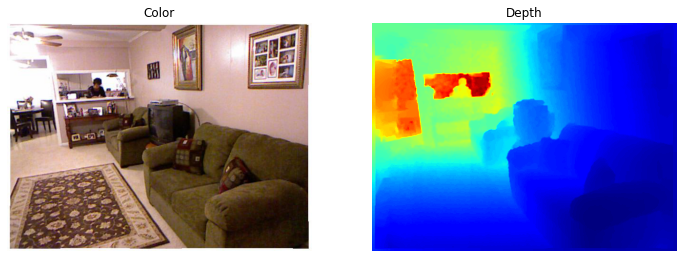

In [9]:
image = images[3]
depth = depths[3]

import utils

utils.plot_sample_tensor(image, depth)

In [47]:
from model.model import *

torch.manual_seed(0)
preds = torch.randn(*depths.shape)

In [ ]:
# single image - run tests on loss and metrics on CPU and GPU Shape [1, x, x]

depth = depths[1]
pred = preds[1]

# mean_l2_loss(pred, depth)
# mean_l1_loss(pred, depth)
# mean_l1_log_loss(pred, depth)
# berHu_loss(pred, depth)

evaluate_predictions(pred, depth)

torch.Size([1, 240, 320])


(tensor(0.5008),
 tensor(0.5008),
 tensor(0.5008),
 tensor(1.0000),
 tensor(168.9788),
 tensor(nan))

In [54]:
# batch - run tests on loss and metrics on CPU and GPU

# mean_l2_loss(preds, depths)
# mean_l1_loss(preds, depths)
# mean_l1_log_loss(preds, depths)
# berHu_loss(preds, depths)

evaluate_predictions(preds, depths)

torch.Size([10, 1, 240, 320])


(tensor(0.5008),
 tensor(0.5008),
 tensor(0.5008),
 tensor(1.0000),
 tensor(337.4914),
 tensor(nan))